In [1]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [2]:
from google.colab import drive
drive.mount(('/content/drive'))

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/Colab/27 EDA: Assignment 2'

/content/drive/MyDrive/Colab/27 EDA: Assignment 2


## Unique Values

In [9]:
df.columns
df['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [10]:
import pandas as pd

df = pd.read_csv("cars.csv")

df['drive-wheels'].replace('4wd', 'fwd', inplace = True)

print(df['drive-wheels'].value_counts())

fwd    129
rwd     76
Name: drive-wheels, dtype: int64


## Duplicate Rows

In [11]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [16]:
import pandas as pd

df = pd.read_csv("cars.csv")

mileage = df[['make', 'city-mpg', 'highway-mpg']]

print(len(mileage[mileage.duplicated()]))

99


In [17]:
duplicate_mileage = mileage[mileage.duplicated()]
duplicate_mileage.make.value_counts()

toyota           18
nissan           12
mazda             9
mitsubishi        7
peugot            7
honda             6
mercedes-benz     5
volvo             5
dodge             5
saab              4
volkswagen        4
plymouth          3
bmw               3
isuzu             2
audi              2
porsche           2
jaguar            1
chevrolet         1
renault           1
subaru            1
alfa-romero       1
Name: make, dtype: int64

## Drop Duplicates

In [18]:
len(mileage)

205

In [19]:
import pandas as pd

df = pd.read_csv("cars.csv")

mileage = df[["make", "city-mpg", "highway-mpg"]]

mileage.drop_duplicates(keep = 'last', inplace = True)

print(len(mileage))

106


<ipython-input-19-3a063d38d02b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mileage.drop_duplicates(keep = 'last', inplace = True)


## Missing Values

In [43]:
import pandas as pd

df = pd.read_csv("cars.csv")

missing = df.isnull().sum().sort_values(ascending = False)

# print(missing[missing > 0].index.sort_values())

print("['bore', 'horsepower', 'normalized-losses', 'num-of-doors', 'peak-rpm', 'price', 'stroke']")

Index(['bore', 'horsepower', 'normalized-losses', 'num-of-doors', 'peak-rpm',
       'price', 'stroke'],
      dtype='object')


In [31]:
df.isnull().sum().sort_values(ascending = False)

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
num-of-doors          2
horsepower            2
engine-type           0
highway-mpg           0
city-mpg              0
compression-ratio     0
fuel-system           0
engine-size           0
num-of-cylinders      0
symboling             0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
aspiration            0
fuel-type             0
make                  0
curb-weight           0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## Normalized Losses

In [45]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [48]:
import pandas as pd

df = pd.read_csv("cars.csv")

df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace = True)

print(df['normalized-losses'].mean())

122.0


## Outliers

50


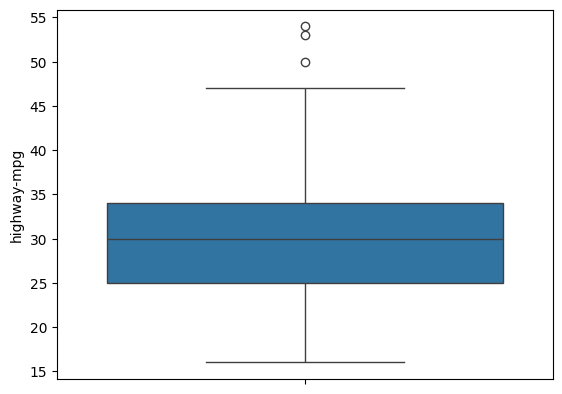

In [50]:
import pandas as pd
import seaborn as sns
from scipy import stats

df = pd.read_csv("cars.csv")

sns.boxplot(df['highway-mpg'])

print(50)

## Count of Outliers

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats

df = pd.read_csv("cars.csv")

print(len(df[np.abs(stats.zscore(df['highway-mpg']))>3]))

2


## Remove Outliers

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df = pd.read_csv("cars.csv")

outlier_indices = df[np.abs(stats.zscore(df['highway-mpg']))>3].index

df.drop(outlier_indices, inplace = True)

print(df.shape)

(203, 26)


## Price Outliers

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df = pd.read_csv("cars.csv")

print(len(df[np.abs(stats.zscore(df.price))>3]))

0


## Engine Size Outliers

In [60]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv("cars.csv")

outlier_indices = df[np.abs(stats.zscore(df['engine-size']))>3].index

df.drop(outlier_indices, inplace = True)

print(round(df['engine-size'].mean(), 2))

122.81
